# Temperature Sampling

See also: https://nlp.stanford.edu/blog/maximum-likelihood-decoding-with-rnns-the-good-the-bad-and-the-ugly/Following 

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import numpy as np

### with a Gaussian probability 

In [66]:
probabilities = np.random.uniform(size=[100])

In [67]:
x_arr = np.linspace(start=0, stop=100, num=100)

In [68]:
normalized_probabilities = probabilities / np.sum(probabilities)

In [69]:
temperatures = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [70]:
modified_probabilities = {}

In [71]:
for temperature in temperatures:
    modified_probabilities[temperature] = normalized_probabilities ** (1/temperature) / \
        np.sum(normalized_probabilities ** (1/temperature))

In [73]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [74]:
plt.style.use('seaborn-white')

from matplotlib import rc
import matplotlib

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
font = {'family' : 'serif',
        'size'   : 14}
matplotlib.rc('font', **font)

#plt.rc('text', usetex=True)
#pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
#matplotlib.rcParams.update(pgf_with_rc_fonts)

Text(0,0.5,' - log(P(x))')

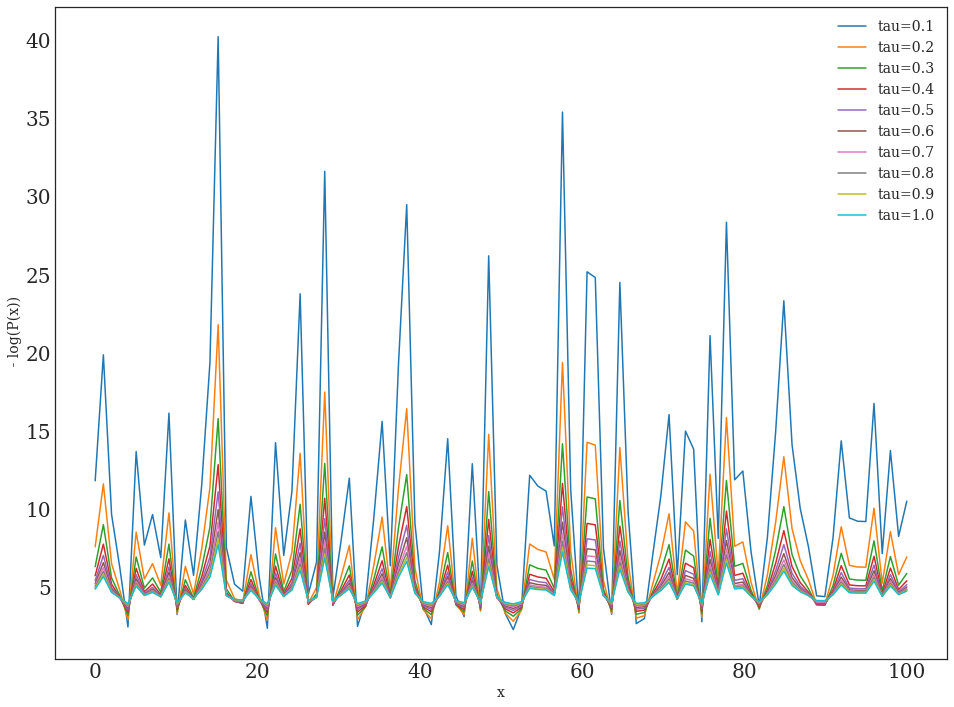

In [75]:
plt.figure(figsize=(16,12))
for temperature in temperatures:
    plt.plot(x_arr, -1 * np.log(modified_probabilities[temperature]), label="tau={}".format(temperature))
plt.legend()
plt.xlabel('x')
plt.ylabel(' - log(P(x))')

# Argmax

The argmax is unchanged

In [76]:
for temperature in temperatures:
    print("argmax:", np.argmax(modified_probabilities[temperature]))

argmax: 51
argmax: 51
argmax: 51
argmax: 51
argmax: 51
argmax: 51
argmax: 51
argmax: 51
argmax: 51
argmax: 51


But when sampling from the distribution, the CDF is modified:

In [81]:
dx = x_arr[1] - x_arr[0]

Text(0,0.5,'CDF(x)')

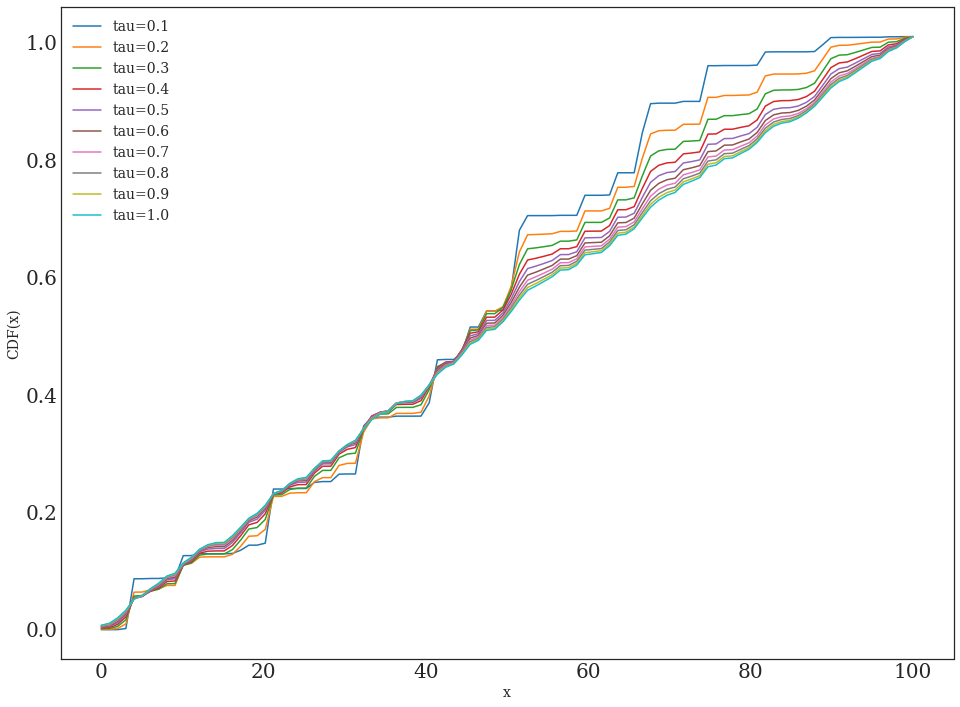

In [83]:
plt.figure(figsize=(16,12))
for temperature in temperatures:
    plt.plot(x_arr, np.cumsum(modified_probabilities[temperature]) * dx, label="tau={}".format(temperature))
plt.legend()
plt.xlabel('x')
plt.ylabel('CDF(x)')